# Simple Example for Section 4 Bounds

This is a simple example of computing the bounds in section 4 (theorems 4.8 and 4.9) with $\dim(\mathcal{O}) = 2$ with features ["pill taken?", "headache relief?"] and three selected possible causes: ["aspirin","caffeine", "placebo"]. We derive bounds for all three possible causes.

To help with intuition, this example uses normalized posterior probabilities (i.e., $\Pr(\mathbf{x})$ in the denominator), but produces the same results as the ranking is the same.

### Define Setup



In [253]:
from typing import List
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


def show_heatmap(data, title):
    # Create the heat map
    sns.heatmap(data, annot=True, cmap='viridis')
    # Display the plot
    plt.title(title)
    plt.show()
    return


class Posterior:
    def __init__(self,lower:float, upper:float, color:str, name:str, distribution_type="uniform") -> None:
        self.lower = lower
        self.upper = upper
        self.color = color
        self.name = name
        self.distribution_type = distribution_type
        return
    def get_bounds(self):
        return [self.lower, self.upper]
    
    def get_pdf(self,x): 
        if self.distribution_type == "uniform":
            return 1/(self.upper - self.lower)
        else:
            return ValueError("No other methods supported")
        
class Cause:
    def __init__(self, name:str, likelihood_dist_l:List[List[float]], likelihood_dist_u:List[List[float]], 
                 prior_l:float, prior_u:float, evidence_dist:List[List[float]]) -> None:
        self.name = name
        self.likelihood_dist_l = likelihood_dist_l
        self.likelihood_dist_u = likelihood_dist_u
        self.prior_l = prior_l
        self.prior_u = prior_u
        self.evidence_dist = evidence_dist
        self.posteriors = self.populate_posteriors() # array of posterior objects for every observation vect
        
        return 
    def populate_posteriors(self):
        posteriors = [[None,None],[None,None]]
        for i in [0,1]:
            for j in [0,1]:
                lower_posterior = self.likelihood_dist_l[i][j]*self.prior_l/self.evidence_dist[i][j]
                upper_posterior = self.likelihood_dist_u[i][j]*self.prior_u/self.evidence_dist[i][j]
                posteriors[i][j] = Posterior(lower=lower_posterior,
                                                  upper=upper_posterior,
                                                  color="blue",
                                                  name=f"{self.name}")
        return  posteriors
    def display_posteriors(self):
        # print(f"Lower posteriors of cause {self.name}:")
        show_heatmap([[self.posteriors[0][0].lower, self.posteriors[0][1].lower], 
              [self.posteriors[1][0].lower, self.posteriors[1][1].lower]], 
              f"Lower Posterior Distribution of '{self.name}'")
        
        show_heatmap([[self.posteriors[0][0].upper, self.posteriors[0][1].upper], 
              [self.posteriors[1][0].upper, self.posteriors[1][1].upper]], 
              f"Upper Posterior Distribution of '{self.name}'")
  
        return
    





Create evidence distribution. Indices of the evidence distribution are as follows

- (0,0)=(no pill taken, no headache relieved)
- (0,1)=(no pill taken, headache relieved)

- (1,0)=(pill taken,  no headache relieved) 
- (1,1)=(pill taken, headache relieved)

This is the only fixed probability assumed.

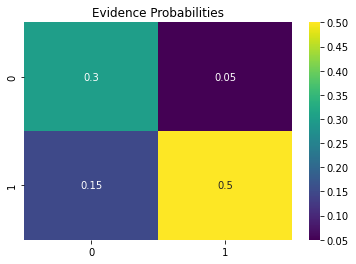

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt


def show_heatmap(data, title):
    # Create the heat map
    sns.heatmap(data, annot=True, cmap='viridis')
    # Display the plot
    plt.title(title)
    plt.show()
    return

EVIDENCE_DIST = [[0.3, 0.05],
                 [0.15, 0.5]]
show_heatmap(EVIDENCE_DIST, "Evidence Probabilities")
Q_CONFIDENCE = 0.95

Declare likelihood and prior ranges for each each cause: Aspirin, Placebo Pill, Caffeine.

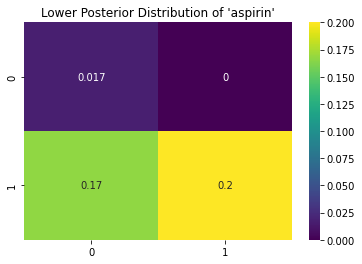

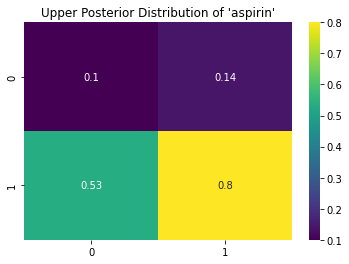

In [255]:
# aspirin
aspirin_likelihood_u = np.array([[0.03,0.007],
                                  [0.08,0.4]])/0.517
aspirin_likelihood_l = [[0.02,0],
                        [0.10,0.4]]
aspirin_prior_l = 0.25
aspirin_prior_u = 0.517

aspirin = Cause(name="aspirin",
                likelihood_dist_l=aspirin_likelihood_l, 
                likelihood_dist_u=aspirin_likelihood_u,
                prior_l=aspirin_prior_l,
                prior_u=aspirin_prior_u,
                evidence_dist=EVIDENCE_DIST)


aspirin.display_posteriors()


# show_heatmap(aspirin_likelihood_l, "Aspirin Likelihood Distribution (Lower)")
# show_heatmap(aspirin_likelihood_u, "Aspirin Likelihood Distribution (Upper)")

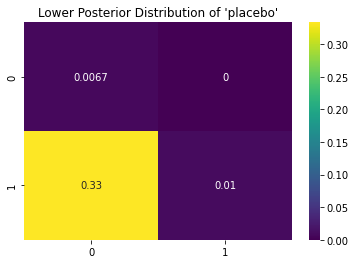

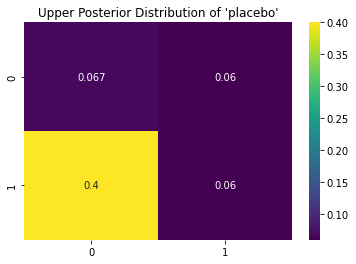

In [257]:
# placebo
# (0,0)=(no pill taken, no headache relieved) | (0,1)=(no pill taken, headache relieved)
# (1,0)=(pill taken,  no headache relieved)   | (1,1)=(pill taken, headache relieved)

placebo_likelihood_u = np.array([[0.02,0.003],
                        [0.06,0.03]])/0.113
placebo_likelihood_l = [[0.02,0],
                        [0.5,0.05]]
placebo_prior_l = 0.1
placebo_prior_u = 0.113

placebo = Cause(name="placebo",
                likelihood_dist_l=placebo_likelihood_l, 
                likelihood_dist_u=placebo_likelihood_u,
                prior_l=placebo_prior_l,
                prior_u=placebo_prior_u,
                evidence_dist=EVIDENCE_DIST)


placebo.display_posteriors()
# show_heatmap(placebo_likelihood_l, "Placebo Likelihood Distribution (Lower)")
# show_heatmap(placebo_likelihood_u, "Placebo Likelihood Distribution (Upper)")

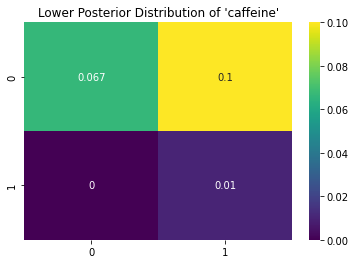

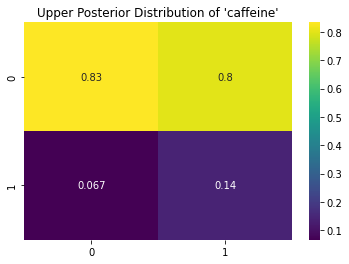

In [258]:
# caffeine
# (0,0)=(no pill taken, no headache relieved) | (0,1)=(no pill taken, headache relieved)
# (1,0)=(pill taken,  no headache relieved)   | (1,1)=(pill taken, headache relieved)

caffeine_likelihood_u = np.array([[0.25,0.04],        # began with posteriors for toy example
                                  [0.01,0.07]])/0.37

caffeine_likelihood_l = [[0.2,0.05],
                        [0.0,0.05]]
caffeine_prior_l = 0.1
caffeine_prior_u = 0.37

caffeine = Cause(name="caffeine",
                likelihood_dist_l=caffeine_likelihood_l, 
                likelihood_dist_u=caffeine_likelihood_u,
                prior_l=caffeine_prior_l,
                prior_u=caffeine_prior_u,
                evidence_dist=EVIDENCE_DIST)


caffeine.display_posteriors()

# show_heatmap(caffeine.posteriors[], "Caffeine Likelihood Distribution (Lower)")
# show_heatmap(caffeine_likelihood_u, "Caffeine Likelihood Distribution (Upper)")

Verify that sum of upper bounds of posteriors are less than or equal to 1. 

In [238]:
for i in [0,1]:
    for j in [0,1]:
        print(caffeine.posteriors[i][j].upper+placebo.posteriors[i][j].upper+aspirin.posteriors[i][j].upper)


1.0
0.9999999999999999
1.0
1.0


Define example posteriors along with 95% confidence intervals.

In [259]:
# define observation ector
pill = 1 # pill is present
relief = 0 # headache not relieved


aspirin_post = aspirin.posteriors[pill][relief]
placebo_post = placebo.posteriors[pill][relief]
caffeine_post = caffeine.posteriors[pill][relief]

aspirin_post.color = "red"
caffeine_post.color = "orange"

posteriors = [aspirin_post,
              placebo_post,
              caffeine_post]

Plot the 95% confidence posterior ranges.

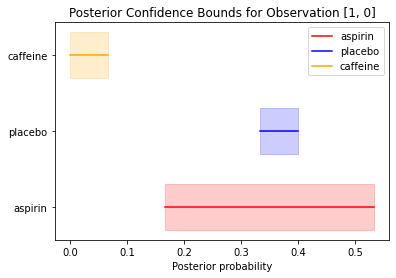

In [261]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()
bar_width = 0.3

# Plot the first horizontal line (stick) with confidence interval

count = 1 # determines y-position on graph

for posterior in posteriors:
    ax.plot([posterior.lower, posterior.upper], 
            [count, count], label=posterior.name, color=posterior.color)
    ax.fill_betweenx([count - bar_width, count + bar_width], posterior.lower, posterior.upper,
                      color=posterior.color, alpha=0.2)

    count += 1 # increment height

# Add labels and title
ax.set_xlabel('Posterior probability')
ax.set_yticks([1, 2, 3])
ax.set_yticklabels([posterior.name for posterior in posteriors])
ax.set_title(f"Posterior Confidence Bounds for Observation {[pill, relief]}")

# Add a legend
ax.legend()

### Finding IsMax
Note that in this experiment we use normalized posteriors for intuition $M_i = \frac{\Pr(C_i|\mathbf{x})\Pr(C_i)}{\Pr(x)}$ for intution, and so they sum up to 1.

Theorem 4.2 makes no assumptions about the placement of the upper and lower posterior bounds. If the upper posteriors bounds do not exceed $1$, the posteriors of selected causes are independent, leaving any remaining probability to the (dependent) last cause, $C_{other}$. (One could use a similar method if the sum of upper posteriors exceeded 1, but formulating the probability density function would require additional steps. We went with the easier approach since this example is for intuition.)

Here's the reasoning:

<u> Independence of Posteriors </u>:


Suppose we have $k$ posteriors (this includes $M_{other}$, the combined posterior that anything not in our selected 'causes' was the cause). Treat each $M_i \in \mathcal{M}$ as a random variable.
Then, **if the sum of upper bounds of every posterior in $\mathcal{M}$ does not exceed 1 (or $\Pr(\mathbf{x})$)**, we can let the first $k-1$ causes be independent (because of this upper bound, selecting *any* random posteriors within this range and adding them up will *never* exceed $\Pr(\mathbf{x})$) while the last posterior, $M_{other}$, is a fully dependent random variable $M_{other} = 1-\sum_i{M_i}$ (or  $M_{other} = \Pr(\mathbf{x})-\sum_i{M_i}$). 

<u> Pr(IsMax(M_i)) is just expected value of an indicator function </u>:

For simplicity let $X$, $Y$, $Z$, ... be the chosen (independent) posterior random variables, and let $x$, $y$, and $z$ be the specific values they take on. Also, suppose we are finding the probability that $X$ is the maximum posterior. Then, let this be the indicator function that x is the maximum.
$$
\mathbf{1}_{\{{x}_{max}\}}(x,y,z) = \begin{cases} 
1 & \text{if } x = \max(\{x,y,z,1-(x+y+z)\}) \\ 
0 & \text{otherwise }
\end{cases}
$$

The expected value of this indicator function basically is the same value as (1) tallying up the total number of configurations of $x$, $y$, $z$, (and $(1-x-y-z)$) where $x$ is the maximum, and then (2) dividing it by the total number of configurations of $x$, $y$, and $z$. This is the same thing as the probability that $X=x$ is the maximum.

We can find this with LOTUS:

$$
\begin{align*}
\Pr(IsMax(X)) &= \int_{x_l}^{x_u} \int_{y_l}^{y_u} \int_{z_l}^{z_u} \mathbf{1}_{\{{x}_{max}\}}(x,y,z)f(x, y, z) \, dz \, dy \, dx\\
&= \int_{x_l}^{x_u} \int_{y_l}^{y_u} \int_{z_l}^{z_u} \mathbf{1}_{\{{x}_{max}\}}(x,y,z)f(x)f(y)f(z) \, dz \, dy \, dx\\
\end{align*}
$$


In [175]:
def indicator(x,y,z):
    return int(x == max(x,y,z,1-(x+y+z))) # ew

def integrand(x:float, x_obj:Posterior, y:float, y_obj:Posterior, 
              z:float, z_obj:Posterior):
    """integrand for expected value"""
    return indicator(x,y,z)*x_obj.get_pdf(x)*y_obj.get_pdf(y)*z_obj.get_pdf(z)


Estimate the integral (Monte-carlo integration technique, scipy complained)

In [176]:
import scipy.integrate as spi
from typing import List

def monte_carlo_integration(function, x_obj, y_obj, z_obj, num_samples=10000000):
    """
    Estimate the integral of a function over a 3D domain using Monte Carlo integration. 

    Parameters:
    - function: callable, the function to integrate. It should accept three arguments (x, y, z).
    - bounds1: tuple, the lower and upper bounds for the first variable (x).
    - bounds2: tuple, the lower and upper bounds for the second variable (y).
    - bounds3: tuple, the lower and upper bounds for the third variable (z).
    - num_samples: int, the number of random samples to use for the estimation (default: 1,000,000).

    Returns:
    - integral_estimate: float, the estimated value of the integral.
    - standard_error: float, the estimated standard error of the integral.
    """
    x_l, x_u = x_obj.lower, x_obj.upper
    y_l, y_u = y_obj.lower, y_obj.upper
    z_l, z_u = z_obj.lower, z_obj.upper

    # Generate random samples
    x_samples = np.random.uniform(x_l, x_u, num_samples)
    y_samples = np.random.uniform(y_l, y_u, num_samples)
    z_samples = np.random.uniform(z_l, z_u, num_samples)

    # Evaluate the integrand at the sample points
    sample_evaluations = np.array([function(x, y, z) for x, y, z in zip(x_samples, y_samples, z_samples)])

    # Compute the volume of the integration region
    volume = (x_u - x_l) * (y_u - y_l) * (z_u - z_l)

    # Estimate the integral as the mean of the evaluations times the volume
    integral_estimate = volume * np.mean(sample_evaluations)

    # Compute the standard error of the mean
    standard_error = volume * np.std(sample_evaluations) / np.sqrt(num_samples)

    return integral_estimate, standard_error


In [177]:
def get_isMax_estimate(chosen:Posterior, rest:List[Posterior]):
    return monte_carlo_integration(lambda x,y,z: integrand(x, chosen, y, rest[0], z, rest[1]), 
                                                                  chosen, rest[0], rest[1])


In [178]:
ismax_aspirin, standard_error_aspirin = get_isMax_estimate(aspirin_post, [placebo_post, caffeine_post])

print("IsMax of Aspirin")
print(f"Estimated integral: {integral_estimate_aspirin}")
print(f"Estimated standard error: {standard_error_aspirin}")

IsMax of Aspirin
Estimated integral: 0.45448460000000024
Estimated standard error: 0.00015745546824745085


In [179]:
# same with placebo (this is zero since C_other would have the maximum posterior)
ismax_placebo, standard_error_placebo = get_isMax_estimate(placebo_post, [caffeine_post, aspirin_post])
print("IsMax of Placebo")
print(f"Placebo integral: {integral_estimate_placebo}")
print(f"Estimated standard error: {standard_error_placebo}")

IsMax of Placebo
Placebo integral: 0.3616113999999998
Estimated standard error: 0.00015194614783713338


In [180]:
ismax_caffeine, standard_error_caffiene = get_isMax_estimate(caffeine_post, [placebo_post, aspirin_post])
print("IsMax of Caffeine")
print(f"Caffeine integral: {integral_estimate_caffiene}")
print(f"Estimated standard error: {standard_error_caffiene}")

IsMax of Caffeine
Caffeine integral: 0.0
Estimated standard error: 0.0


In [181]:
ismax_other = 1 - np.sum([ismax_placebo, ismax_caffeine, ismax_aspirin])
print(f"IsMax of C_other: {ismax_other}")

IsMax of C_other: 0.18387079999999956


### Calculating BER

This example is small enough to directly calculate lower and upper bounds of BER with the summation form of Definition 4.3 (Sekeh et. al.) without the use of estimation techniques. (For more complex problems with many causes $|\mathcal{O}| = 2^{|\mathcal{C}|}$ may be very large, so it may be more practical apply the estimation techniques while treating the observations as continuous).

$$\epsilon = 1 - \sum_{\mathbf{x} \in \mathcal{O}} \Pr(\textbf{x})\max_i \Pr(C_i|\textbf{x}).$$

In [182]:
# define helpers
def get_max(posteriors:List[float]):
    # return maximum posterior (including M_other)
    posteriors.append(1 - sum(posteriors)) # append remaining probability, should be very close to 0
    return max(posteriors)


def get_posteriors(i:int, j:int, cause_objs:List[Cause], upper:bool):
    # get list of poteriors for the [i,j] observation vector
    posteriors = []
    for cause in cause_objs:
        posterior_obj = cause.posteriors[i][j]
        if upper:
            posteriors.append(posterior_obj.upper)
        else:
            posteriors.append(posterior_obj.lower)
    return posteriors    


Upper bound of BER

In [183]:
ber_upper = 1 - sum([EVIDENCE_DIST[i][j]*get_max(get_posteriors(i,j, [aspirin, placebo, caffeine], 
                                                                upper=True)) 
                                                                for i in [0,1] for j in [0,1]])
print(f"BER upper bounds: {ber_upper}")

BER upper bounds: 0.22999999999999998


In [184]:
ber_lower = 1 - sum([EVIDENCE_DIST[i][j]*get_max(get_posteriors(i,j, [aspirin, placebo, caffeine], 
                                                                upper=False)) 
                                                                for i in [0,1] for j in [0,1]])
print(f"BER lower bounds: {ber_lower}")

BER lower bounds: 0.21699999999999997


### Calculate Abductive Error Guarantees
Now that we have $\epsilon_{lower}$, $\epsilon_{upper}$, and the IsMax values for all possible causes, we can follow section 4.3 to find the final general error rate bounds.

Calculate $\gamma_{i,upper}$ and $\gamma_{i,lower}$ for each cause, the error rate (when posterior $M_i$ is chosen) given the assumption that posteriors lie in their 95% confidence intervals.
$$
    \gamma_{i,upper} = \epsilon_{\text{upper}}\Pr(IsMax(M_i)) + (1-l_i)(1-\Pr(IsMax(M_i)))
$$

and

$$
\gamma_{i,lower} = \epsilon_{\text{lower}}\Pr(IsMax (M_i)) + (1-u_i)(1-\Pr(IsMax(M_i)))
$$

Set the preferred observation vector.

In [194]:
pill = 1 # did you take a pill?
relief = 0 # was your headache relieved?

In [200]:
# maps cause object to probability of wrong abduction and posterior is maximum
gamma_upper = {
    "aspirin"  : ber_upper*ismax_aspirin + 
                (1-aspirin.posteriors[pill][relief].lower)*(1-ismax_aspirin),
    "caffeine" : ber_upper*ismax_caffeine + 
                (1-caffeine.posteriors[pill][relief].lower)*(1-ismax_caffeine),
    "placebo"  : ber_upper*ismax_placebo + 
                (1-placebo.posteriors[pill][relief].lower)*(1-ismax_placebo),
    } 

gamma_lower = {
    "aspirin"  : ber_lower*ismax_aspirin + 
                (1-aspirin.posteriors[pill][relief].upper)*(1-ismax_aspirin),
    "caffeine" : ber_lower*ismax_caffeine + 
                (1-caffeine.posteriors[pill][relief].upper)*(1-ismax_caffeine),
    "placebo"  : ber_lower*ismax_placebo + 
                (1-placebo.posteriors[pill][relief].upper)*(1-ismax_placebo),
    } 


print(gamma_upper)
print(gamma_lower)

{'aspirin': 0.5591680479999996, 'caffeine': 1.0, 'placebo': 0.508719268}
{'aspirin': 0.3532137391999999, 'caffeine': 0.9333333333333333, 'placebo': 0.4614644572}


Referring to the diagram of posterior bounds, causes "aspirin" and "placebo" have error rates around 50% because they are tied winners with close midpoints, and so either cause may be the true maximum posterior. Caffeine has an extremely high error rate because if it is contained inside its 95% bounds, it has no chance of being the maximum posterior.

Compute the final bounds.

$$\Pr(W)\leq 1-q^k(1-\gamma_{\text{i, upper}})$$

$$\Pr(W)\geq \gamma_{\text{i, lower}} q^k$$

In [210]:

k = 3 # there are 3 selected causes
general_upper = {key : 1-(Q_CONFIDENCE**k)*(1-gamma_bound) for key, gamma_bound in gamma_upper.items()}

general_lower = {key : gamma_bound*Q_CONFIDENCE**k for key, gamma_bound in gamma_upper.items()}


print(f"General upper bounds of: {[pill, relief]}\n", general_upper)
print(f"General lower bounds: {[pill, relief]}\n", general_lower)


General upper bounds of: [1, 0]
 {'aspirin': 0.6220417051539997, 'caffeine': 1.0, 'placebo': 0.5787881824015}
General lower bounds: [1, 0]
 {'aspirin': 0.47941670515399964, 'caffeine': 0.8573749999999999, 'placebo': 0.4361631824014999}


We can do the same for all other observation vectors

In [220]:
def get_general_bounds(pill, relief):
    gamma_upper = {
        "aspirin"  : ber_upper*ismax_aspirin + 
                    (1-aspirin.posteriors[pill][relief].lower)*(1-ismax_aspirin),
        "caffeine" : ber_upper*ismax_caffeine + 
                    (1-caffeine.posteriors[pill][relief].lower)*(1-ismax_caffeine),
        "placebo"  : ber_upper*ismax_placebo + 
                    (1-placebo.posteriors[pill][relief].lower)*(1-ismax_placebo),
        } 

    gamma_lower = {
        "aspirin"  : ber_lower*ismax_aspirin + 
                    (1-aspirin.posteriors[pill][relief].upper)*(1-ismax_aspirin),
        "caffeine" : ber_lower*ismax_caffeine + 
                    (1-caffeine.posteriors[pill][relief].upper)*(1-ismax_caffeine),
        "placebo"  : ber_lower*ismax_placebo + 
                    (1-placebo.posteriors[pill][relief].upper)*(1-ismax_placebo),
        } 


    k = 3 # there are 3 selected causes
    general_upper = {key : 1-(Q_CONFIDENCE**k)*(1-gamma_bound) for key, gamma_bound in gamma_upper.items()}

    general_lower = {key : gamma_bound*Q_CONFIDENCE**k for key, gamma_bound in gamma_upper.items()}


    print(f"General upper bounds of {[pill, relief]}\n", general_upper)
    print(f"General lower bounds {[pill, relief]}\n", general_lower)
    return # general_upper, general_lower

In [221]:
get_general_bounds(0,0)

General upper bounds of [0, 0]
 {'aspirin': 0.6922070116839998, 'caffeine': 0.9428416666666667, 'placebo': 0.7575573379385001}
General lower bounds [0, 0]
 {'aspirin': 0.5495820116839996, 'caffeine': 0.8002166666666666, 'placebo': 0.6149323379385}


In [222]:
get_general_bounds(0,1)

General upper bounds of [0, 1]
 {'aspirin': 0.7000031568539997, 'caffeine': 0.9142625, 'placebo': 0.7612056880515}
General lower bounds [0, 1]
 {'aspirin': 0.5573781568539996, 'caffeine': 0.7716374999999999, 'placebo': 0.6185806880514999}


In [224]:
get_general_bounds(1,1)

General upper bounds of [1, 1]
 {'aspirin': 0.6064494148139998, 'caffeine': 0.99142625, 'placebo': 0.7557331628820001}
General lower bounds [1, 1]
 {'aspirin': 0.4638244148139997, 'caffeine': 0.8488012499999998, 'placebo': 0.613108162882}
